In [12026]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [12027]:
dataset = pd.read_csv("2023_Precios_Casas_RM.csv")
dataset=dataset.drop(['id','Realtor','Ubicacion','Price_USD'], axis=1)

##separar data.info() en otro codigo
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   7779 non-null   int64  
 1   Price_UF    7779 non-null   int64  
 2   Comuna      7779 non-null   object 
 3   Dorms       7779 non-null   int64  
 4   Baths       7714 non-null   float64
 5   Built Area  7533 non-null   float64
 6   Total Area  7571 non-null   float64
 7   Parking     5489 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 486.3+ KB


In [12028]:
dataset.isna().sum()

Price_CLP        0
Price_UF         0
Comuna           0
Dorms            0
Baths           65
Built Area     246
Total Area     208
Parking       2290
dtype: int64

In [12029]:
dataset = dataset.dropna().reset_index(drop=True)


In [12030]:
#Como medida de seguridad, eliminalos las filas duplicadas.
dataset = dataset.drop_duplicates().reset_index(drop=True)


In [12031]:
dataset.isna().sum()

Price_CLP     0
Price_UF      0
Comuna        0
Dorms         0
Baths         0
Built Area    0
Total Area    0
Parking       0
dtype: int64

Ordenar por Precio_CLP

In [12032]:
dataset = dataset.rename(columns = {'Built Area' : 'built_Area', 'Total Area' : 'total_Area'})
dataset = dataset.sort_values(by="Price_UF").reset_index(drop=True)


Eliminamos precios con valores extremadamente bajos

In [12033]:
dataset['Price_UF'].describe()

count      5092.000000
mean      10760.684014
std       11251.571702
min           0.000000
25%        3512.000000
50%        6300.000000
75%       14500.000000
max      155000.000000
Name: Price_UF, dtype: float64

In [12034]:
dataset[dataset['Price_UF']>90000]

,Price_CLP,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
5088,3381050000,95000,Colina,6,8.0,1046.0,4820.0,16.0
5089,3736950000,105000,LasCondes,5,7.0,460.0,4925.0,8.0
5090,4804650000,135000,LasCondes,10,12.0,2400.0,5061.0,15.0
5091,5516450000,155000,LasCondes,4,3.0,140.0,160.0,2.0


In [12035]:
dataset = dataset.drop(dataset[dataset['Price_UF']>90000].index).reset_index(drop=True)
dataset

,Price_CLP,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
0,8400,0,Santiago,4,3.0,127.0,250.0,2.0
1,10990,0,Colina,5,4.0,220.0,5000.0,4.0
2,4350,0,PuenteAlto,3,2.0,74.0,190.0,2.0
3,5836,0,LaFlorida,3,2.0,127.0,300.0,2.0
4,4800,0,PuenteAlto,4,3.0,90.0,182.0,3.0
...,...,...,...,...,...,...,...,...
5083,2847200000,80000,LasCondes,5,6.0,650.0,2250.0,6.0
5084,2847200000,80000,Vitacura,6,6.0,720.0,5048.0,10.0
5085,3131920000,88000,LasCondes,7,5.0,1477.0,4443.0,20.0
5086,3203100000,90000,Vitacura,6,5.0,450.0,5000.0,8.0


In [12036]:
dataset[dataset['Price_UF'] < 1000]

,Price_CLP,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
0,8400,0,Santiago,4,3.0,127.0,250.0,2.0
1,10990,0,Colina,5,4.0,220.0,5000.0,4.0
2,4350,0,PuenteAlto,3,2.0,74.0,190.0,2.0
3,5836,0,LaFlorida,3,2.0,127.0,300.0,2.0
4,4800,0,PuenteAlto,4,3.0,90.0,182.0,3.0
5,4780,0,PuenteAlto,3,3.0,90.0,183.0,1.0
6,4100,0,Maipú,4,3.0,107.0,145.0,3.0
7,6800,0,Pudahuel,3,3.0,100.0,199.0,2.0
8,2085,0,Talagante,2,1.0,80.0,160.0,2.0
9,3171,0,Maipú,3,1.0,60.0,60.0,1.0


In [12037]:

dataset= dataset.loc[dataset['Price_UF'] > 1000 ]
print(dataset.shape)
dataset=dataset.reset_index(drop=True)
dataset


(5063, 8)


,Price_CLP,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
0,37000000,1040,SanBernardo,2,1.0,42.0,42.0,2.0
1,37000000,1040,Melipilla,3,1.0,84.0,1050.0,2.0
2,39000000,1096,LaPintana,3,1.0,63.0,49.0,1.0
3,40000000,1124,Peñaflor,2,1.0,50.0,25.0,10.0
4,42000000,1180,LaPintana,3,1.0,60.0,69.0,1.0
...,...,...,...,...,...,...,...,...
5058,2847200000,80000,LasCondes,5,6.0,650.0,2250.0,6.0
5059,2847200000,80000,Vitacura,6,6.0,720.0,5048.0,10.0
5060,3131920000,88000,LasCondes,7,5.0,1477.0,4443.0,20.0
5061,3203100000,90000,Vitacura,6,5.0,450.0,5000.0,8.0


Analisis de la caracteristica 'Bath' (baños)

In [12038]:
dataset['Baths'].value_counts()

Baths
2.0     1455
3.0     1375
1.0      976
4.0      736
5.0      327
6.0      116
7.0       51
8.0       15
9.0        6
11.0       2
21.0       1
13.0       1
12.0       1
29.0       1
Name: count, dtype: int64

In [12039]:
dataset['Baths'].describe()

count    5063.000000
mean        2.748173
std         1.463498
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        29.000000
Name: Baths, dtype: float64

In [12040]:
dataset[dataset['Baths'] > 7]

,Price_CLP,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
428,79000000,2220,Quilicura,2,11.0,47.0,89.0,1.0
2207,180000000,5058,LoPrado,8,8.0,139.0,282.0,3.0
2574,234894000,6600,Colina,3,21.0,94.0,345.0,2.0
2678,250000000,7024,Conchalí,9,9.0,190.0,190.0,1.0
3108,338105000,9500,Colina,13,13.0,350.0,350.0,6.0
3828,526732000,14800,Pudahuel,5,8.0,193.0,595.0,4.0
3830,526732000,14800,Pudahuel,5,8.0,193.0,597.0,4.0
3873,533850000,15000,LasCondes,10,8.0,208.0,283.0,1.0
3874,533850000,15000,LaFlorida,16,12.0,389.0,890.0,3.0
4231,672651000,18900,Peñalolén,12,8.0,561.0,1860.0,1.0


In [12041]:
dataset = dataset.drop(dataset[dataset['Baths'] > 7].index).reset_index(drop=True)
dataset['Baths'].describe()

count    5036.000000
mean        2.709095
std         1.324794
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         7.000000
Name: Baths, dtype: float64

Analisis de la caracteristica 'Dorms'

In [12042]:
dataset['Dorms'].value_counts()

Dorms
3     1799
4     1473
5      840
2      359
6      332
7      119
8       50
10      17
1       15
9       15
11       7
12       4
14       3
13       1
15       1
24       1
Name: count, dtype: int64

In [12043]:
dataset['Dorms'].describe()

count    5036.000000
mean        3.965647
std         1.401592
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        24.000000
Name: Dorms, dtype: float64

In [12044]:
dataset[dataset['Dorms'] > 8]

,Price_CLP,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
408,78000000,2192,Colina,11,4.0,184.0,184.0,3.0
1234,125000000,3512,LoEspejo,12,5.0,170.0,170.0,1.0
1472,135206410,3799,LoEspejo,10,5.0,181.0,300.0,3.0
1508,138445100,3890,LoPrado,9,2.0,160.0,160.0,2.0
1510,138445100,3890,LoPrado,9,2.0,90.0,160.0,1.0
1909,160000000,4496,Conchalí,14,2.0,100.0,205.0,1.0
2188,180000000,5058,LaCisterna,9,3.0,250.0,273.0,2.0
2543,230000000,6462,Conchalí,10,5.0,110.0,470.0,4.0
2606,239990000,6743,Maipú,9,4.0,140.0,220.0,1.0
2610,240000000,6743,SanMiguel,9,5.0,500.0,330.0,2.0


In [12045]:
dataset = dataset.drop(dataset[dataset['Dorms'] >= 8].index).reset_index(drop=True)
dataset['Dorms'].describe()

count    4937.000000
mean        3.858011
std         1.148379
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Dorms, dtype: float64

Analisis de la caracteristica 'total_Area'

In [12046]:
dataset['total_Area'].describe()

count      4937.000000
mean        853.089123
std       11002.380081
min           1.000000
25%         130.000000
50%         212.000000
75%         438.000000
max      678000.000000
Name: total_Area, dtype: float64

In [12047]:
dataset = dataset.sort_values(by="total_Area").reset_index(drop=True)
dataset[dataset['total_Area'] > 3000]

,Price_CLP,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
4714,240000000,6743,Pirque,2,2.0,3101.0,3101.0,6.0
4715,551645000,15500,Santiago,5,7.0,300.0,3150.0,1.0
4716,782980000,22000,Colina,4,4.0,350.0,3151.0,4.0
4717,2106928000,59200,LasCondes,6,4.0,650.0,3200.0,13.0
4718,590794000,16600,LaFlorida,6,7.0,560.0,3290.0,8.0
...,...,...,...,...,...,...,...,...
4932,231335000,6500,Tiltil,5,4.0,200.0,54000.0,10.0
4933,1099731000,30900,LasCondes,4,4.0,327.0,94929.0,3.0
4934,159000000,4468,Independencia,4,2.0,99.0,160000.0,1.0
4935,130000000,3653,Santiago,3,1.0,120000.0,300000.0,2.0


In [12048]:
dataset = dataset.drop(dataset[dataset['total_Area'] > 3000].index).reset_index(drop=True)
dataset['total_Area'].describe()

count    4714.000000
mean      340.485787
std       379.345676
min         1.000000
25%       128.000000
50%       200.000000
75%       399.750000
max      3000.000000
Name: total_Area, dtype: float64

Eliminamos las filas que tengas Built_Area >= Total_Area

In [12049]:
dataset[dataset['built_Area'] >= dataset['total_Area']].count()

Price_CLP     582
Price_UF      582
Comuna        582
Dorms         582
Baths         582
built_Area    582
total_Area    582
Parking       582
dtype: int64

In [12050]:
dataset = dataset.drop(dataset[dataset['built_Area'] >= dataset['total_Area']].index).reset_index(drop=True)
dataset['total_Area'].describe()


count    4132.000000
mean      364.384076
std       391.627892
min        49.000000
25%       140.000000
50%       221.500000
75%       420.000000
max      3000.000000
Name: total_Area, dtype: float64

Analisis de la caracteristica Built Area

In [12051]:
dataset['built_Area'].describe()

count    4132.000000
mean      149.881413
std       103.236392
min         1.000000
25%        83.000000
50%       120.000000
75%       180.000000
max      1200.000000
Name: built_Area, dtype: float64

In [12052]:
dataset[dataset['built_Area'] < 30]

,Price_CLP,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
6,185068000,5200,Providencia,2,2.0,4.0,57.0,1.0
61,82000000,2304,Maipú,4,2.0,18.0,70.0,1.0
400,65000000,1826,PuenteAlto,3,1.0,15.0,100.0,1.0
1607,90000000,2529,Pudahuel,5,1.0,1.0,180.0,1.0


In [12053]:
dataset = dataset.drop(dataset[dataset['built_Area'] < 30].index).reset_index(drop=True)
dataset['built_Area'].describe()

count    4128.000000
mean      150.017442
std       103.193574
min        30.000000
25%        84.000000
50%       120.000000
75%       180.000000
max      1200.000000
Name: built_Area, dtype: float64

In [12054]:
dataset[dataset['built_Area'] > 500]

,Price_CLP,Price_UF,Comuna,Dorms,Baths,built_Area,total_Area,Parking
3743,1204721500,33850,LoBarnechea,7,7.0,520.0,820.0,7.0
3848,755504520,21228,Providencia,4,4.0,600.0,1000.0,4.0
3863,1708320000,48000,Vitacura,7,7.0,544.0,1001.0,3.0
3867,1708320000,48000,Vitacura,5,5.0,628.0,1003.0,5.0
3907,644001050,18095,LasCondes,6,7.0,800.0,1092.0,6.0
3911,1245650000,35000,LasCondes,5,4.0,590.0,1100.0,4.0
3916,1743874410,48999,LoBarnechea,7,6.0,670.0,1100.0,4.0
3938,1601550000,45000,Vitacura,4,4.0,582.0,1178.0,5.0
3951,1761705000,49500,LoBarnechea,5,7.0,550.0,1200.0,3.0
3957,1240311500,34850,Vitacura,7,5.0,532.0,1200.0,4.0


In [12055]:
dataset = dataset.drop(dataset[dataset['built_Area'] > 500].index).reset_index(drop=True)
dataset['built_Area'].describe()

count    4075.000000
mean      143.695951
std        86.552818
min        30.000000
25%        83.000000
50%       120.000000
75%       175.000000
max       500.000000
Name: built_Area, dtype: float64

Analisis de la caracteristica 'Parking'

In [12056]:
print(dataset['Parking'].value_counts())


Parking
2.0     1537
1.0     1146
3.0      683
4.0      337
5.0      161
6.0      118
8.0       30
7.0       30
10.0      14
11.0       6
20.0       3
14.0       3
9.0        2
12.0       2
22.0       1
18.0       1
15.0       1
Name: count, dtype: int64


In [12057]:
print(dataset['Parking'].describe())

count    4075.000000
mean        2.450307
std         1.674749
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        22.000000
Name: Parking, dtype: float64


In [12058]:
dataset = dataset.drop(dataset[dataset['Parking'] >= 12].index).reset_index(drop=True)
dataset['Parking'].describe()

count    4064.000000
mean        2.412402
std         1.499267
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        11.000000
Name: Parking, dtype: float64

In [12059]:

print(dataset['Parking'].value_counts())

Parking
2.0     1537
1.0     1146
3.0      683
4.0      337
5.0      161
6.0      118
8.0       30
7.0       30
10.0      14
11.0       6
9.0        2
Name: count, dtype: int64


In [12060]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4064 entries, 0 to 4063
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   4064 non-null   int64  
 1   Price_UF    4064 non-null   int64  
 2   Comuna      4064 non-null   object 
 3   Dorms       4064 non-null   int64  
 4   Baths       4064 non-null   float64
 5   built_Area  4064 non-null   float64
 6   total_Area  4064 non-null   float64
 7   Parking     4064 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 254.1+ KB


Correlacion Entre Variables

In [12061]:
correlacion=dataset.drop(['Price_CLP','Comuna'], axis=1).corr()
correlacion.info()
correlacion

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Price_UF to Parking
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_UF    6 non-null      float64
 1   Dorms       6 non-null      float64
 2   Baths       6 non-null      float64
 3   built_Area  6 non-null      float64
 4   total_Area  6 non-null      float64
 5   Parking     6 non-null      float64
dtypes: float64(6)
memory usage: 508.0+ bytes


,Price_UF,Dorms,Baths,built_Area,total_Area,Parking
Price_UF,1.000000,0.478033,0.680789,0.855699,0.746389,0.519319
Dorms,0.478033,1.000000,0.573001,0.600272,0.378243,0.311198
Baths,0.680789,0.573001,1.000000,0.704324,0.514219,0.394200
built_Area,0.855699,0.600272,0.704324,1.000000,0.745026,0.520390
total_Area,0.746389,0.378243,0.514219,0.745026,1.000000,0.574391
Parking,0.519319,0.311198,0.394200,0.520390,0.574391,1.000000


In [12062]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4064 entries, 0 to 4063
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   4064 non-null   int64  
 1   Price_UF    4064 non-null   int64  
 2   Comuna      4064 non-null   object 
 3   Dorms       4064 non-null   int64  
 4   Baths       4064 non-null   float64
 5   built_Area  4064 non-null   float64
 6   total_Area  4064 non-null   float64
 7   Parking     4064 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 254.1+ KB


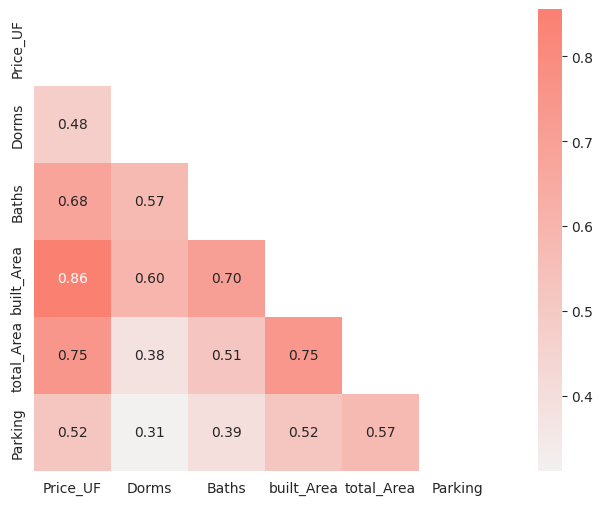

In [12063]:
colores = sns.light_palette('salmon', as_cmap=True)
mask = np.triu(correlacion)

with sns.axes_style("white"):
    plt.figure(figsize=(11, 6))
    sns.heatmap(correlacion, cmap=colores, mask=mask, square=True, annot=True, fmt='.2f')
##plt.show()


In [12064]:
data = dataset[['Parking', 'Baths', 'Dorms','built_Area', 'total_Area']]
labels = dataset['Price_UF']

In [12065]:
x_train,x_test,y_train,y_test=train_test_split(data, labels, test_size=0.2)

In [12066]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

% REsultado


In [12067]:
model.score(x_test,y_test)

0.786786020976079

In [12068]:
y_pred = model.predict(x_test)

In [12069]:

clf = RandomForestClassifier()
clf = clf.fit(x_train, y_train)

In [12070]:
clf.score(x_test, y_test)

0.02952029520295203

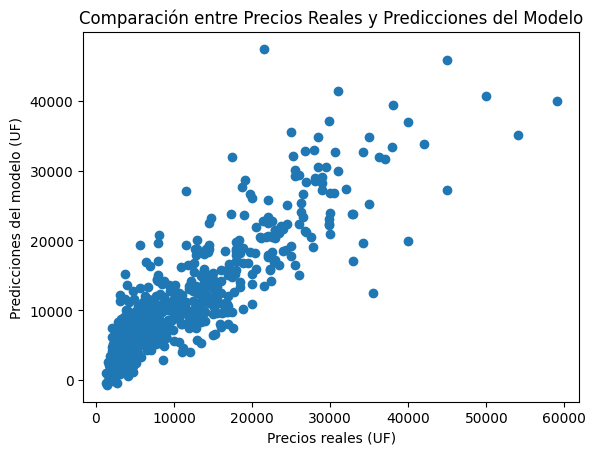

In [12071]:
plt.scatter(y_test, y_pred)
plt.xlabel("Precios reales (UF)")
plt.ylabel("Predicciones del modelo (UF)")
plt.title("Comparación entre Precios Reales y Predicciones del Modelo")
plt.show()




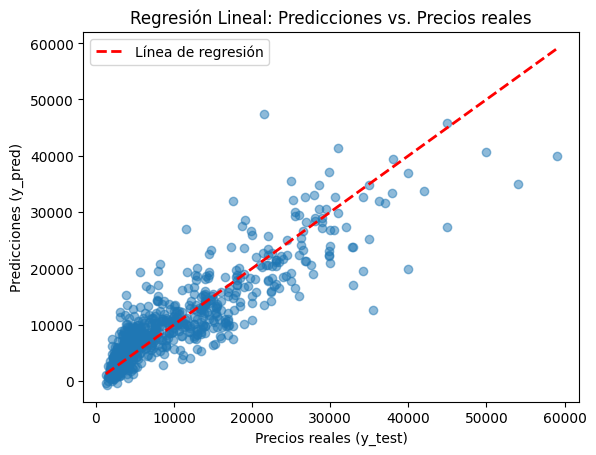

In [12072]:


plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Precios reales (y_test)')
plt.ylabel('Predicciones (y_pred)')
plt.title('Regresión Lineal: Predicciones vs. Precios reales')
plt.legend()
plt.show()


